<div style="text-align: center;">
    <h1>California Telco Customer churn Analysis</h1>
    <img src="./images/telcoms.png" style="width: 80%">    
</div>

## Project Overview
Churn, in the context of a telecom company, refers to the process of a customer deciding to discontinue the use of a company's services. It is an important metric for the company to track as it can indicate a decline in customer satisfaction, increased competition, or other factors that may negatively impact the company's revenue and market share. Understanding the reasons behind customer churn and developing strategies to reduce it is a crucial aspect of customer relationship management for telecom companies, as it helps them to retain their existing customer base and maximize their revenue.

## Business Problem
The telecom company is facing a high rate of customer churn, leading to a decline in revenue and loss of market share. The company needs to understand:-
a)the reasons behind customer churn, 
b)identify the segments of customers most likely to churn, 
c)and develop strategies to reduce churn and improve customer retention

## Data Understang

The Telco customer churn data contains information about a fictional telecommunications company that provided home phone and Internet services to 7032 customers in California in Q3. The training dataset contains 7032 samples, each with 21 features and one Boolean variable, "churn," that indicates the class of the sample.

The features in the data are:

1. customerID - a unique identifier for each customer
2. gender - indicates the gender of the customer (male or female)
3. SeniorCitizen - indicates whether the customer is a senior citizen (represented as 1 for yes and 0 for no)
4. Partner - indicates whether the customer has a partner (represented as "Yes" or "No")
5. Dependents - indicates whether the customer has dependents, who rely on them as a primary source of income (represented as "Yes" or "No")
6. tenure - the number of months the customer has been with the company
7. PhoneService - indicates whether the customer has a phone service (represented as "Yes" or "No")
8. MultipleLines - indicates whether the customer has multiple phone lines (represented as "Yes," "No," or "No phone service")
9. InternetService - the customer's internet service provider (represented as "DSL," "Fiber optic," or "No")
10. OnlineSecurity - indicates whether the customer has online security (represented as "Yes," "No," or "No internet service")
11. OnlineBackup - indicates whether the customer has online backup (represented as "Yes," "No," or "No internet service")
12. DeviceProtection - indicates whether the customer has device protection (represented as "Yes," "No," or "No internet service")
13. TechSupport - indicates whether the customer has tech support (represented as "Yes," "No," or "No internet service")
14. StreamingTV - indicates whether the customer has streaming TV (represented as "Yes," "No," or "No internet service")
15. StreamingMovies - indicates whether the customer has streaming movies (represented as "Yes," "No," or "No internet service")
16. Contract - indicates the type of contract the customer has according to duration (represented as "Month-to-month," "One year," or "Two year")
17. PaperlessBilling - indicates whether the customer's bills are issued in paperless form (represented as "Yes" or "No")
18. PaymentMethod - the payment method used by the customer (represented as "Electronic check," "Mailed check," "Credit card (automatic)," or "Bank transfer (automatic)")
19. MonthlyCharges - the amount charged for service on a monthly basis
20. TotalCharges - the cumulative charges for service during the customer's subscription (tenure) period
21. Churn - the target variable that we are trying to predict or estimate, indicating whether the customer has left, stayed, or signed up for the service.



## Metric of Success

* High Accuracy is needed
* Since we are dealing with an imbalanced dataset,we will keep track of the Recall and confusion matrix

* **Accuracy** = Number of correctly predited test samples/Total number of test sample


* **Recall** = True Positives/ (True positive + False negatives)
* **F1 Score** which is a harmonic mean of precison and recall will be our measure of the model performance
* **ROC_AUC score** which shows how well the model is performing in terms of classifying the values

## 1.0 Data Preparation
This stage involves cleaning, transforming, and organizing data so that it can be used for a specific task or analysis.The activitie here involves data cleaning, transformations and normalization.


### Load the Dataset using Pandas

In [124]:
#import pandas to load the data
import pandas as pd
#import numpy for mathematical calculations
import numpy as np
#import matplotlib for visualization
import matplotlib.pyplot as plt
#set %matplotlib inline so the graphs will display immediately below the cell that creates them
%matplotlib inline
#import seaborn for visualization
import seaborn as sns
#use ggplot for styling
plt.style.use('ggplot')
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
#import the metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score
#parameter tuning model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
#load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [125]:
#make a copy of the dataset
data = df.copy()
#preview the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Check the general structure of the dataset i.e datatypes, shape, summary statistics

In [126]:
#check the the datatypes and meta data for data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [127]:
#we notice that the of the colums are of type object. Only 4 are of type integer and float

In [128]:
#check the shape of the dataset
data.shape

(7032, 21)

In [129]:
#our dataset has 7032 rows and 21 columns

In [130]:
#check the summary statics of the dataset
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [131]:
#Only "SeniorCitizen", "tenure" , "	TotalCharges" and "MonthlyCharges" are assigned to numeric data types.This is not machine laerning friendly and 
#will need to convert them

#### Data Cleaning

In [132]:
#check for null entries
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [133]:
#our data set doesnt contain any null values

In [134]:
#check for duplicates
df.duplicated(subset=['customerID']).sum()

0

In [135]:
#our data doesnt contain duplicate values

### Data Transformation

#### Convert Categorical variables to numeric dummies using pandas

In [136]:
#lets drop the customer id from the dataset as it doesnt have any more use now
data.drop('customerID', axis=1, inplace=True)
#select categirical data = data.select
categoricals = data.select_dtypes(include=['object'])


In [137]:
#convert to numerics, inclue drop_first = True to aviod multicollinaerity
categoricals_to_num = pd.get_dummies(categoricals, drop_first=True)

In [138]:
numericals = data.select_dtypes(exclude=['object'])

In [139]:
#combine numeric features and the dummy numeric features
data_transformed = pd.concat([numericals, categoricals_to_num], axis=1)

In [140]:
#confirm the combining correctly
data_transformed.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
6389,0,71,106.0,7723.70,1,1,1,1,0,1,...,1,0,1,0,1,1,0,0,0,1
3709,1,11,78.5,874.20,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4143,1,7,89.0,605.45,1,1,0,1,0,0,...,1,0,1,0,0,1,0,1,0,0
2229,0,23,59.7,1414.20,1,1,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
4632,0,1,70.0,70.00,1,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## 2.0 Exploratory Data Analysis
Here we will plot a few visualizations to see how our data looks like graphically

### Univariate 
Here we look at how our target variable is class is distributed

In [141]:
#check for percentage distribution of the churn class
data_transformed['Churn_Yes'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn_Yes, dtype: float64

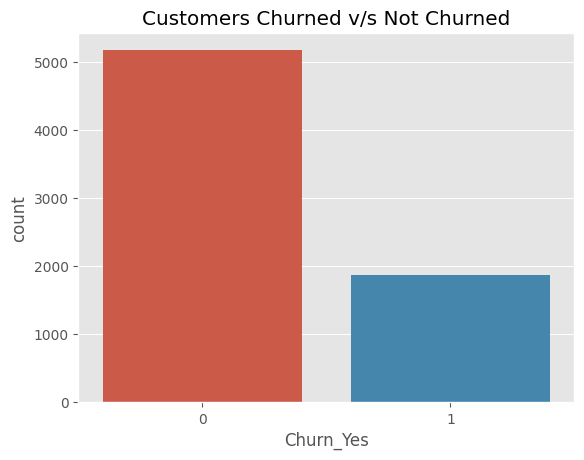

In [142]:
sns.countplot(data=data_transformed, x='Churn_Yes')
plt.title('Customers Churned v/s Not Churned');
plt.savefig('./images/churn_class')


In [143]:
#there is a class imbalance issue as depicted from the above plot.73.42% of the data represnts customers who did not churn and  26.58% represents customers who churned

**Check for correlation of predictor features to the class label by plotting barplot. For the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.** 

In [144]:
#inspect the correlation of fetures to churn
corr_df = data_transformed.corr()
#leave out the 0 values i.e not churn
corr_yes_churn = corr_df['Churn_Yes'].sort_values().iloc[1:-1]
corr_yes_churn

Contract_Two year                       -0.301552
OnlineSecurity_No internet service      -0.227578
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
InternetService_No                      -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545


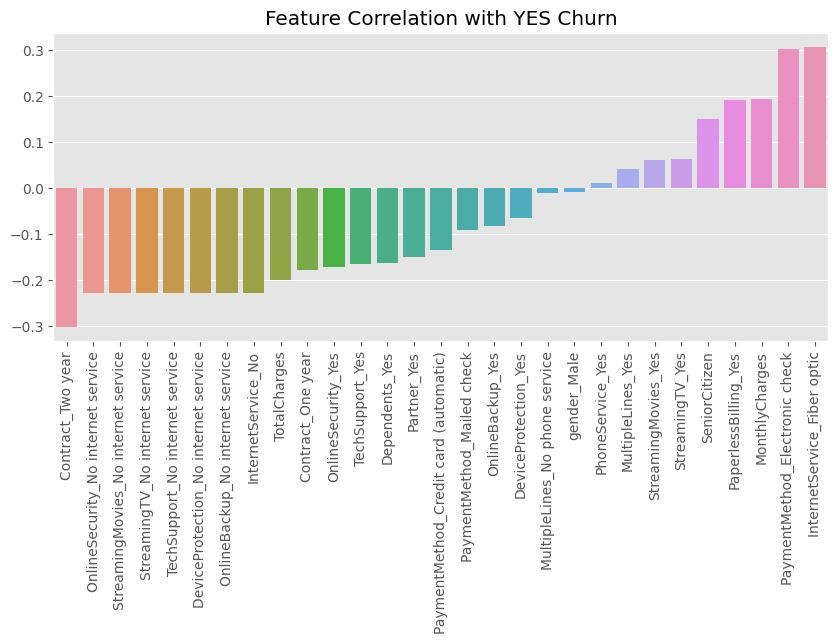

In [145]:
#plot a bar plot on the series created above
plt.figure(figsize=(10,4))
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.title("Feature Correlation with YES Churn")
plt.xticks(rotation=90);
plt.savefig('./images/churn_features')

In [146]:
#From the visualization we see that (Contract_Two year -0.301552
# OnlineSecurity_No internet service      -0.227578
# StreamingMovies_No internet service     -0.227578
# StreamingTV_No internet service         -0.227578
# TechSupport_No internet service         -0.227578
# DeviceProtection_No internet service    -0.227578
# OnlineBackup_No internet service        -0.227578
# InternetService_No                      -0.227578
# TotalCharges                            -0.199484
# Contract_One year                       -0.178225
# OnlineSecurity_Yes                      -0.171270
# TechSupport_Yes                         -0.164716
# Dependents_Yes                          -0.163128
# Partner_Yes                             -0.149982
# PaymentMethod_Credit card (automatic)   -0.134687
# PaymentMethod_Mailed check              -0.090773
# OnlineBackup_Yes                        -0.082307
# DeviceProtection_Yes                    -0.066193
# MultipleLines_No phone service          -0.011691
# gender_Male                             
# ) have a negative correlation to churning while (
# PhoneService_Yes                         0.011691
# MultipleLines_Yes                        0.040033
# StreamingMovies_Yes                      0.060860
# StreamingTV_Yes                          0.063254
# SeniorCitizen                            0.150541
# PaperlessBilling_Yes                     0.191454
# MonthlyCharges                           0.192858
# PaymentMethod_Electronic check           0.301455
# InternetService_Fiber optic              
# ) have a postive correlaion with churning

### check the distribution of positively conreltaed features with a hue of churn

In [147]:
postive_corr_feat = ['PhoneService_Yes','MultipleLines_Yes', 'StreamingMovies_Yes','SeniorCitizen','PaperlessBilling_Yes',
                     'MonthlyCharges','PaymentMethod_Electronic check','InternetService_Fiber optic']


**Explore the distrbution of TotalCharges between Churn categories with a boxplot.**

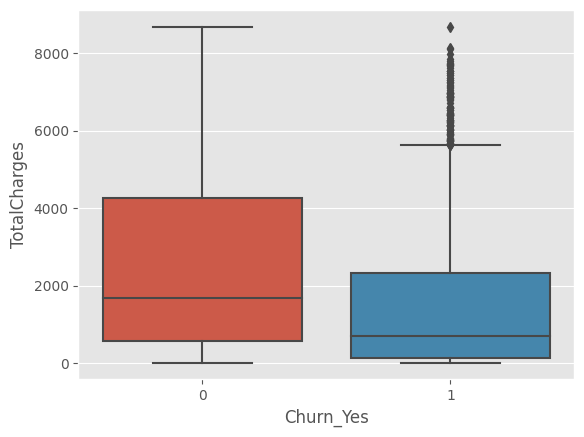

In [148]:
sns.boxplot(data=data_transformed, x='Churn_Yes', y='TotalCharges');

In [149]:
#we notice that the 'yes' churn class has some outliers, with an vaerage total charges of about 1000, 
#while the 'No' class has no outliers with an average total charge of about 1800

**Boxplot showing the distribution of TotalCharges per Contract type, with a hue coloring based on the Churn class.**

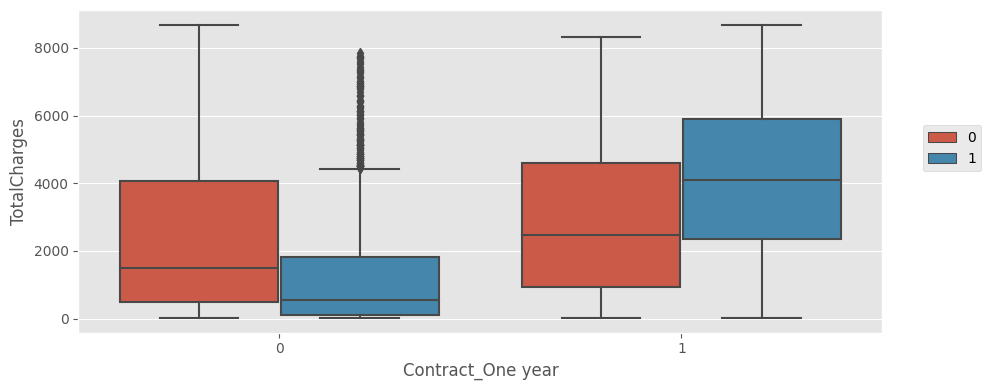

In [150]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data_transformed, x='Contract_One year', y='TotalCharges', hue='Churn_Yes');
plt.legend(loc=(1.05,0.5));
plt.tight_layout()

In [151]:
#from the above plot, we see that there is very little difference in terms of charges for the people with Month-to-Month Contarct
#there is however a noticeable difference for the people with contracts of one or two years. The people who chhurn out are charged highly

## check the distribution of InternetService with a hue of churn

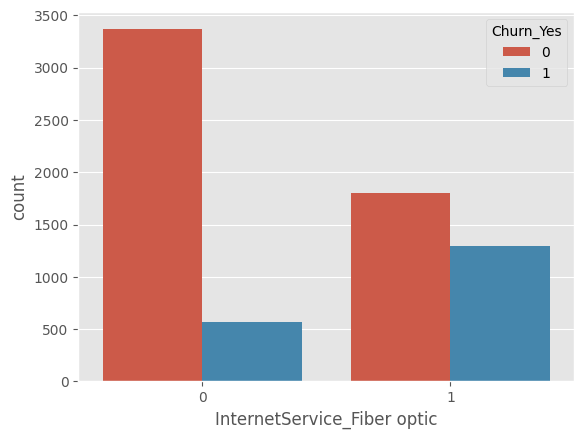

In [152]:
df['InternetService'].value_counts()
sns.countplot(data=data_transformed, x='InternetService_Fiber optic', hue='Churn_Yes');

In [153]:
#its noted that most people who churn out use Fibre Optic Internet service

## check the churn pattern for Internet service in relation to contract type
Does A company's tech support influence customer retention?

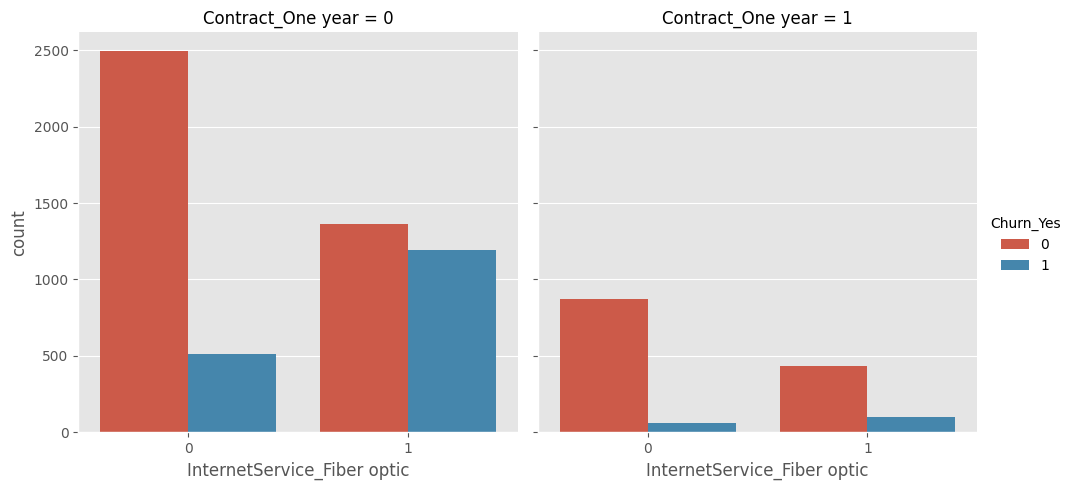

In [154]:
sns.catplot(data=data_transformed, x = 'InternetService_Fiber optic', hue='Churn_Yes', kind='count', 
           col='Contract_One year');

In [155]:
#its noted that customers who use the internet service of type fibre optic and on month to month contract have a quite high churning rate compared to 
#DSL and those who do not use the internet.
#Generally most customers who use intrernet service are on month-to-month contract

## check the distribution of TechSupport with a hue of churn
Does a company's tech support influence customer retention?

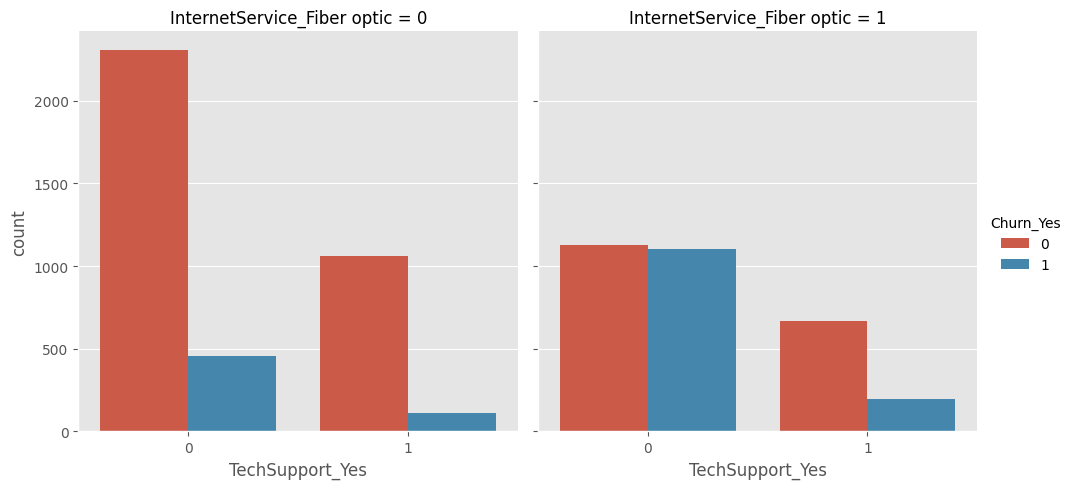

In [156]:
sns.catplot(data=data_transformed, x = 'TechSupport_Yes', hue='Churn_Yes', kind='count', 
           col='InternetService_Fiber optic');

In [157]:
#its noted that customers who are not subscribed to Fiber optic internet service dont churn out alot  eveb when they dont receive  Techsupport

**Check citizen Seniority in relation to churning**

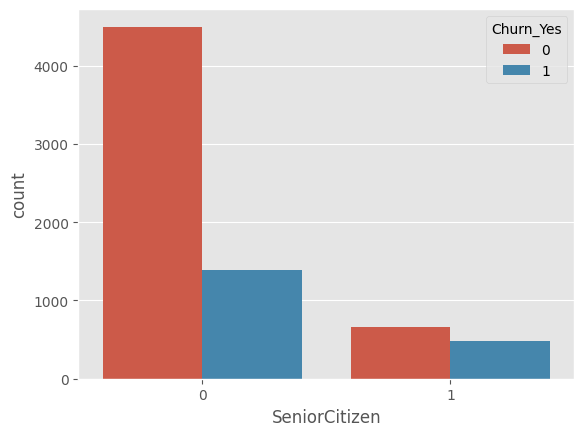

In [158]:

sns.countplot(data=data_transformed, x='SeniorCitizen', hue='Churn_Yes');

In [159]:
#most people who churn out of the service are not senior citizens

**Check the number of contract types available**

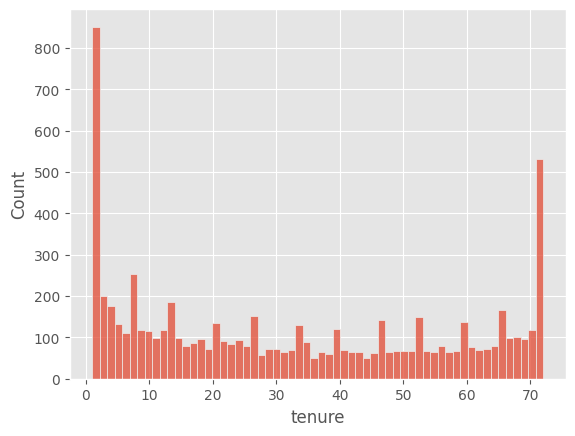

In [160]:
sns.histplot(data=df, x='tenure', bins=60);

In [161]:
#most customers stay on for one to 2 months
# We also have many customesrs who have stayed for more than 70 months
#Other customers are just in between 10-65 months

**A histogram showing the number of Churns based on the Contract type and the number of months they have been subscribers.**

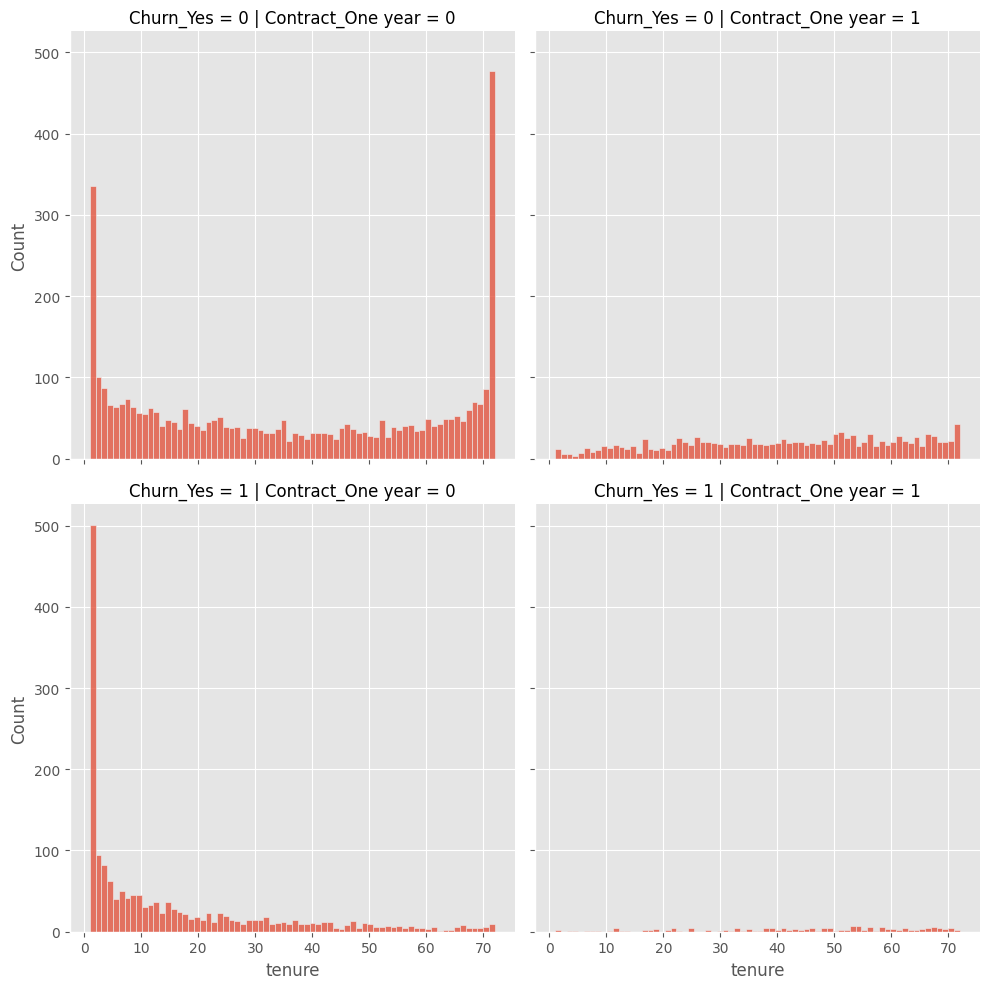

In [162]:
sns.displot(data=data_transformed, x='tenure', bins=70, col='Contract_One year', row='Churn_Yes');

In [163]:
#from the above plot, we see that most people who churn out are on less than one year contract.
#maybe we could ask the company to look for ways of encouraging people on month-to-month contract to stay longer
# We also notice that there are people who have stayed for more than 10 months and are still on less than one year contract
#could this be because of higher charges?

**Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

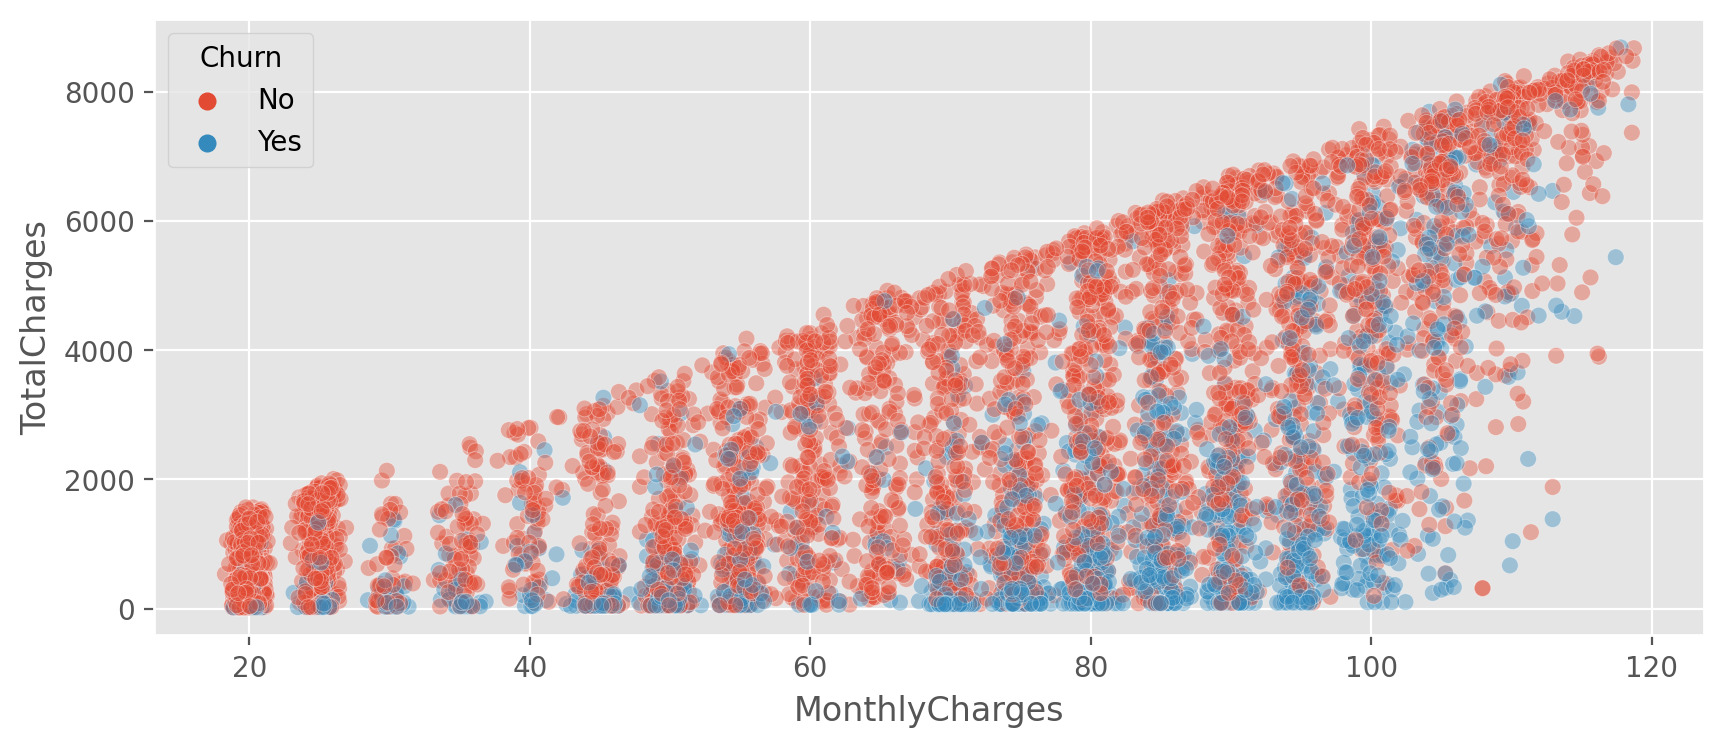

In [164]:
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn',
               alpha=0.4, linewidth=0.3);

In [165]:
#We can see that a lot of people tend to churn when their Monthly charges are higher
#even though there isnt match of total charges

### Get the percentage churn (churn rate) based on the tenure
**We will begin by grouping the data by churn and tenure then calculate the percentage by dividing the yes churn group bt the
total of yes churn and no churn the multiply by 100**

In [166]:
#get the yes churn group based on the count 
#transpose the dataframe for easy reading and grabbing the yes class
yes_churn = data_transformed.groupby(['Churn_Yes', 'tenure']).count().transpose()[1]
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MonthlyCharges,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
TotalCharges,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender_Male,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner_Yes,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents_Yes,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService_Yes,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines_No phone service,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines_Yes,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService_Fiber optic,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [167]:
#get the no churn group 
#transpose the dataframe for easy reading and grabbing the no class
no_churn = data_transformed.groupby(['Churn_Yes', 'tenure']).count().transpose()[0]
no_churn 

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MonthlyCharges,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
TotalCharges,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender_Male,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner_Yes,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents_Yes,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService_Yes,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines_No phone service,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines_Yes,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService_Fiber optic,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [168]:
#calculate the percentage of people that churned
churn_rate = 100 * yes_churn/(yes_churn + no_churn)
churn_rate.transpose()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,,,,,,,,,,,,,,,,,,,,,
1,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,...,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212,61.990212
2,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,...,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672,51.680672
3,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
4,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,...,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091,47.159091
5,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,...,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301,48.120301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
69,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,...,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053,8.421053
70,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,...,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697,9.243697


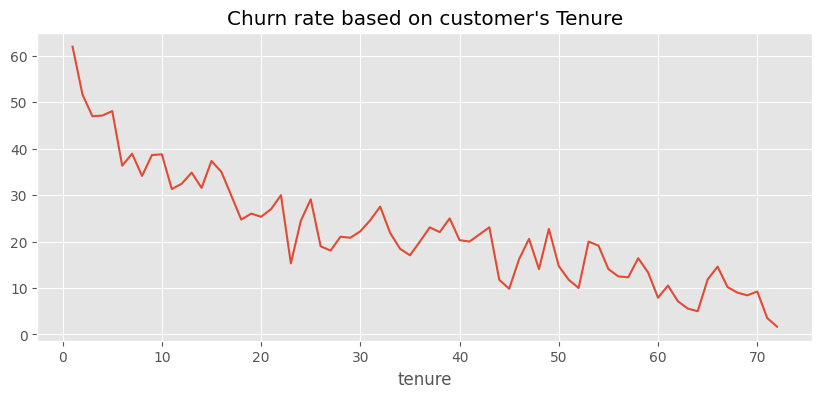

In [169]:
#transpose the churn_rate for readability, and easy feature selection
#check the churn rate base of off SeniorCitizen count, its the saame accross the board. Another column could be used
#then plot the churn rate
churn_rate.transpose()['SeniorCitizen'].plot(figsize=(10,4))
plt.title("Churn rate based on customer's Tenure");
plt.savefig('./images/churn_rate')

In [170]:
#we notice that people with less tenure tend to churn out a lot.

# 4.0 Feature Engineering

### Create broader sections that groups the tenure of a  customer into below units  and assign it to a new column Tenure Cohort
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months' 
   * 'Over 48 Months'

In [171]:
#create a funtion for grouping people's tenures
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure >12 and tenure < 25:
        return '12-24 Months'
    elif tenure >24 and tenure < 48:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
           

In [172]:
#create a new column based on the tenure column
data_transformed['Tenure Cohort'] = data_transformed['tenure'].apply(cohort)

In [173]:
#preview the df[Tenure cohort]
data_transformed['Tenure Cohort'].sample(4)

3808    Over 48 Months
6510    Over 48 Months
4683    Over 48 Months
5580      24-48 Months
Name: Tenure Cohort, dtype: object

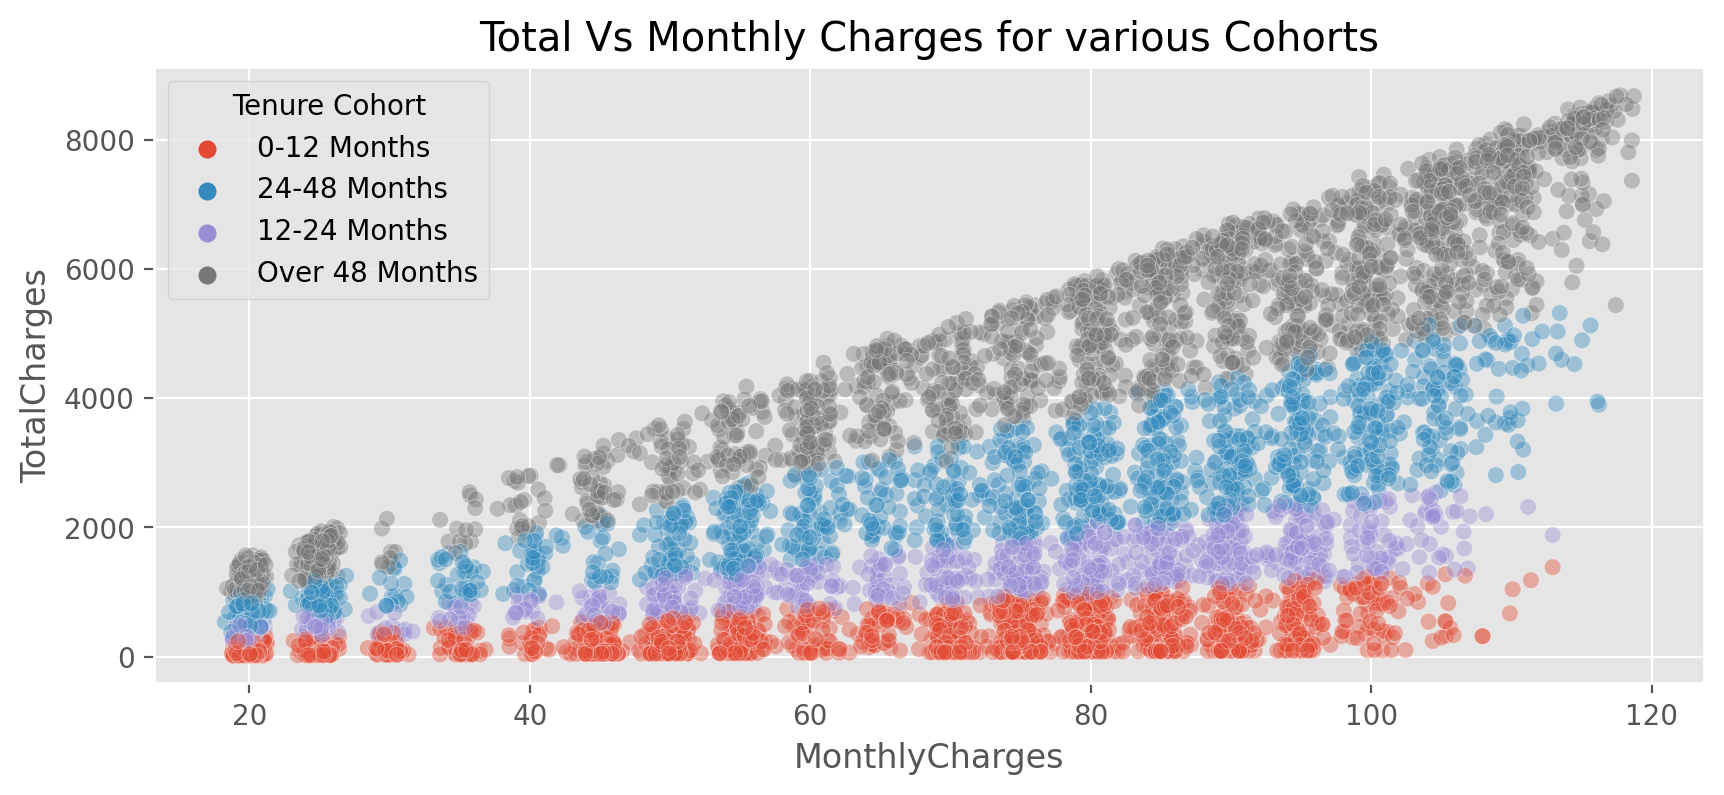

In [174]:
#didplay a scatter plot of the monthly charges agaisnt total charges with a hue of  Tenure Cohort
plt.figure(figsize=(10,4), dpi=200)
sns.scatterplot(data=data_transformed, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort',
               alpha=0.4, linewidth=0.3);
plt.title('Total Vs Monthly Charges for various Cohorts')
plt.savefig('./images/total_month_charges')

In [175]:
#we can clearly see that the total charges are highest for the people who stay for more than 48 months, 
#followed by people who stay between 24-48 months then 12-24 months
#and lowest for people who stay less than 12 months

**A count plot showing the churn count per cohort.**

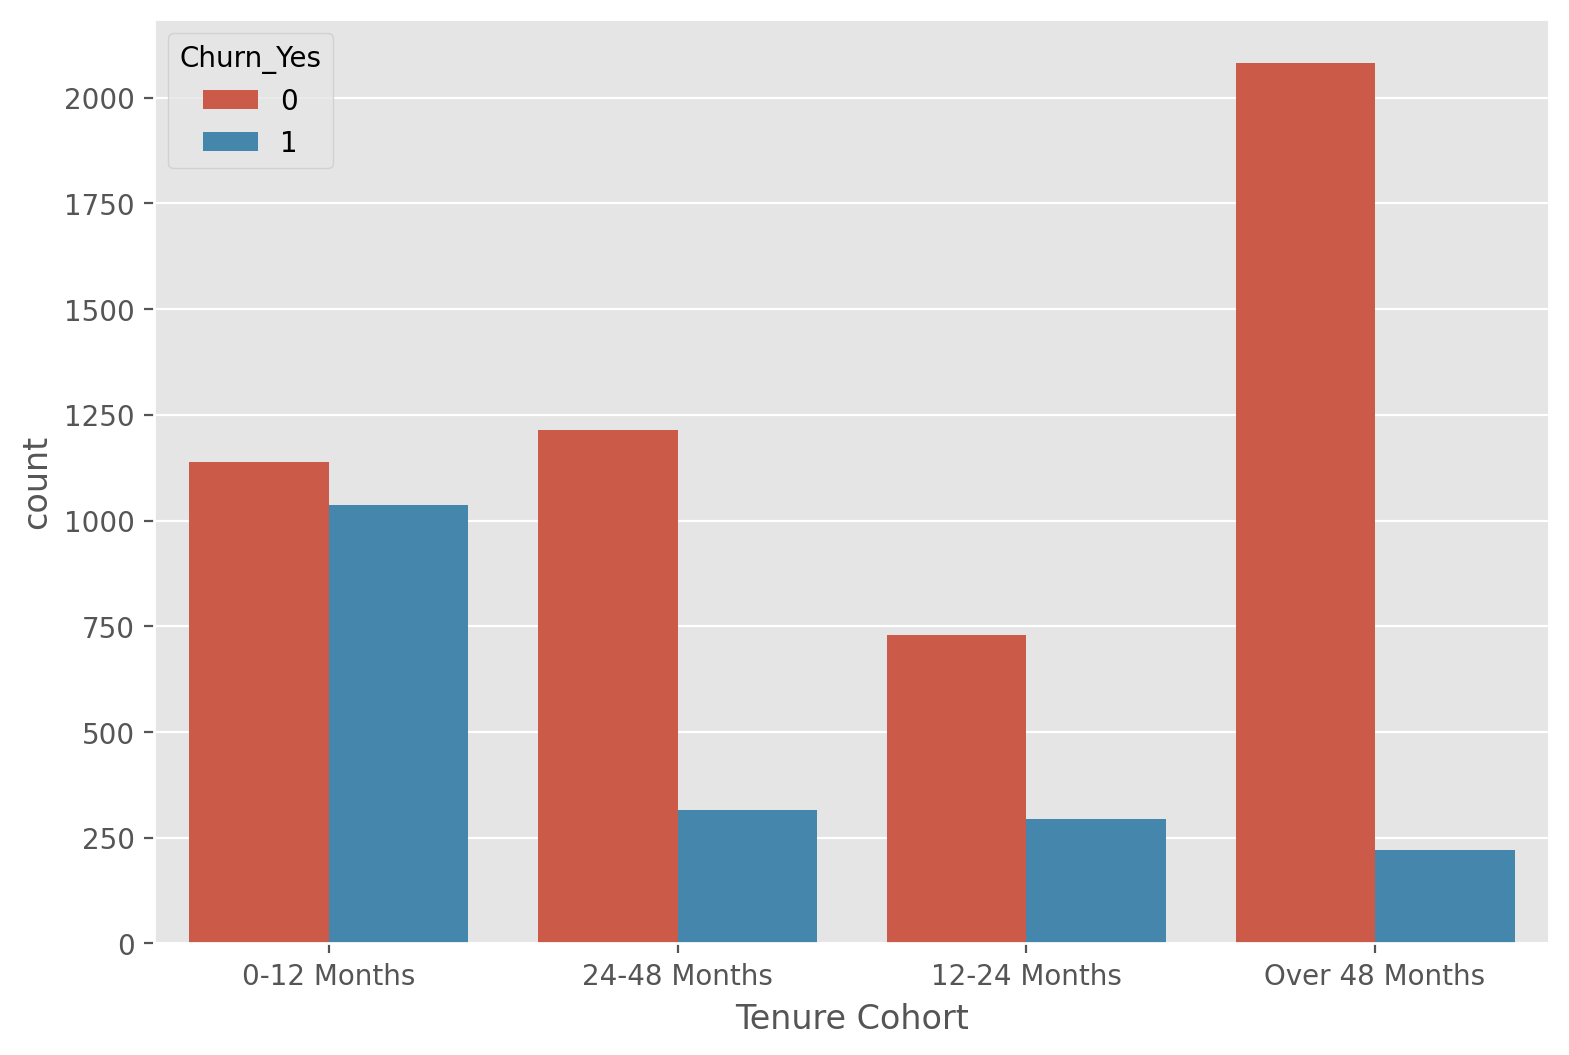

In [176]:
plt.figure(figsize=(9,6), dpi=200)
sns.countplot(data=data_transformed, x='Tenure Cohort', hue='Churn_Yes');

In [177]:
#its claer that most people who have stayed on the service for long are not likely to churn

## 5.0 Data Preprocessing
**Here we look at separating features and the label column and converting categorical features into numerical**


In [178]:
#convert the tenure cohort column to numeric for modeling
Tenure_Cohort_numeric = pd.get_dummies(data_transformed['Tenure Cohort'], prefix='Tenure Cohort',drop_first=True)
data_transformed = pd.concat([data_transformed,Tenure_Cohort_numeric], axis=1)
data_transformed = data_transformed.drop('Tenure Cohort', axis=1)


In [179]:
#Separate out the data into X features and Y label and the CustomerID sinec it wont be useful in modeling
X = data_transformed.drop(['Churn_Yes'], axis=1)
y = data_transformed['Churn_Yes']
X.sample(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
1556,0,1,74.95,74.95,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
2153,0,57,84.50,4845.40,0,1,1,1,0,1,...,1,0,1,1,0,1,0,0,0,1
1120,0,12,49.05,593.05,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


**Feature Selection**

Here we try to remove multicolliniarity by removing he highly correlated features. A correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. In our case  we take 0.75 as a cut-off and see how many high correlations we have.

In [180]:
#make a copy of the predictors data- X
X1 = X.copy()
#generate a correlation matrix and display if the
#correlation is >0.75
abs(X1.corr()) > 0.75

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
SeniorCitizen,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tenure,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
MonthlyCharges,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TotalCharges,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
gender_Male,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Partner_Yes,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Dependents_Yes,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PhoneService_Yes,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
MultipleLines_No phone service,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
MultipleLines_Yes,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [181]:
# save absolute value of correlation matrix as a data frame
# convert all values to absolute value
# stack the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking


df=X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [182]:
#check the dataframe correlation and exclude the 
#feature correlation to itself
df = df[(df.cc>.75) & (df.cc <1)]
df

,cc
pairs,
"(Tenure Cohort_Over 48 Months, tenure)",0.858930
"(tenure, TotalCharges)",0.825880
"(InternetService_Fiber optic, MonthlyCharges)",0.787195
"(StreamingTV_No internet service, MonthlyCharges)",0.763191


In [183]:
#we needto drop one feature per the correlated pair, but from the plot of how features are correlated to the class label,
#all the other features seem to be of importance

features_todrop = ['StreamingTV_No internet service']
X = X.drop(features_todrop, axis=1)    

In [184]:
# split data  into train and test
#import the train test split module
from sklearn.model_selection import train_test_split
#create a train_test_split with 80% train data since our dataset is quite small
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("X_train:",X_train.shape)
print("y_train:", y_train.shape)

X_train: (5625, 32)
y_train: (5625,)


### Normalize the data using a standard scaler

In [185]:
#import a standard scaler
from sklearn.preprocessing import StandardScaler
#instantiate the scaler
scaler =  StandardScaler()
#fit and transform x_train
X_train = scaler.fit_transform(X_train)
#transform X_test
X_test = scaler.transform(X_test)


## 6.0 Predictive Modeling

**We wil explore 1 Logistic Regression and 5 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, XGBoost.**


## Baseline Model

### Logistic Regression
Logistic regression is used to estimate the probability of descrete values based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds. We will use it as our baseline model since It is very fast at classifying unknown records.

In [186]:
#import logistic model
from sklearn.linear_model import LogisticRegression
#instantiate a decision tree classifier
logreg = LogisticRegression()

#fit the model on the training data
logreg.fit(X_train, y_train)

#make predictions on test data
preds = logreg.predict(X_test)


In [187]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.66      0.54      0.59       355

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.81      0.81      0.81      1407



<Figure size 1920x1440 with 0 Axes>

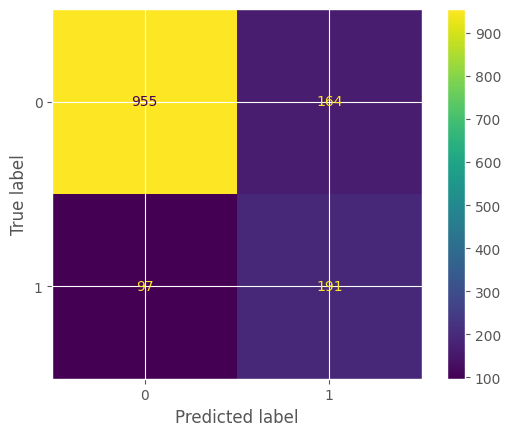

In [188]:
#get the performance of the model using by plotting the confusion metrix
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(preds, y_test);

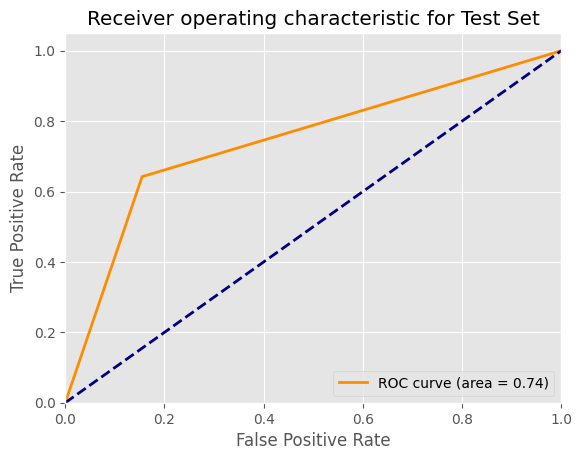

<Figure size 640x480 with 0 Axes>

In [240]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()
plt.savefig('./images/logisticreg.png')

In [190]:
# the model's overall accuracy good (81%), but its not doing quite well on classifying data as we have an F1 score of 88% 
#on the 0 class which has more data and  59% on the 1 clas which has less data. The AUC_ROC  score is 74%
#We can look into more models to check for better accuracy of low variance.

### K-Nearest Neighbors (KNN)
    
 **We will build our second model off of the K-NeighborsClassifier with hyperparameter tuning and see if our performance improves**
 
NN is a distance-based classifier, meaning that it implicitly assumes that the smaller the distance between two points, the more similar they are. In KNN, each column acts as a dimension.

In [191]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
#define the kvalues
k_values =list(range(1,30))

param_grid = dict(n_neighbors=k_values)

#instantiate gridsearch
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# Fit the classifier
grid.fit(X_train, y_train)
#get the best estimators
grid.best_estimator_.get_params()


Fitting 10 folds for each of 29 candidates, totalling 290 fits


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 24,
 'p': 2,
 'weights': 'uniform'}

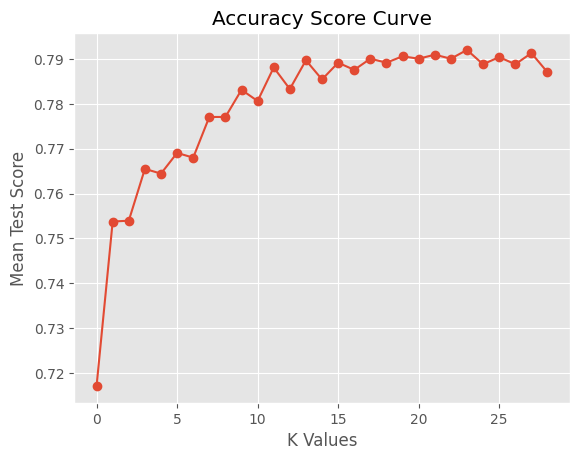

In [192]:
#get the cv_results
pd.DataFrame(grid.cv_results_)['mean_test_score'].plot(marker = 'o')
plt.xlabel('K Values')
plt.ylabel('Mean Test Score')
plt.title('Accuracy Score Curve');

In [193]:
#this shows that when we increase our K value, the accuracy increases up until 25 when it starts to decrease

In [194]:
# Predict on the test set
preds = grid.predict(X_test)

In [195]:
#check the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1052
           1       0.61      0.52      0.56       355

    accuracy                           0.80      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



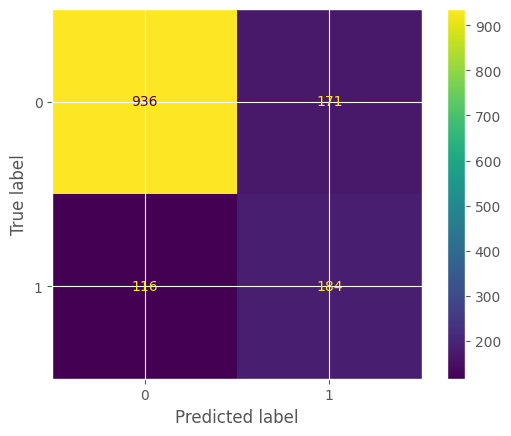

In [196]:
#get the performance of the model using by plotting the confusion metrix
ConfusionMatrixDisplay.from_predictions(preds, y_test);

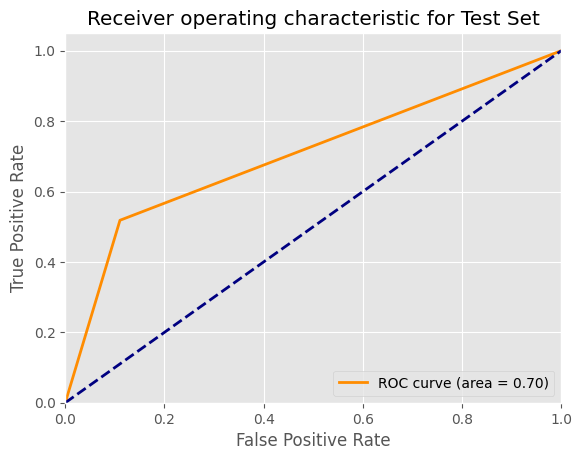

In [197]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

In [198]:
# A KNN model has reduced performance (80%) compared to the earlier model-the logistic regression that had an accuracy score of 81%
#the F1 score on the yes_churn class is also quite poor 56% and 87% for no churn.The AUC_ROC is 70%
#We will try to use the Random Forest and see if our model performance improves

### Random Forest
Here we try to improve our second Model using a vanilla random Forest classifier.
Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.Random forest has an advantage of low variance compared to decision tree.

In [199]:
# import the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [200]:
#instantiate the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_features=10, max_depth=10, class_weight="balanced" )

#fit the model to the train data
rf.fit(X_train, y_train)

#make predictions
preds = rf.predict(X_test)

In [201]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1052
           1       0.54      0.73      0.62       355

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.81      0.78      0.79      1407



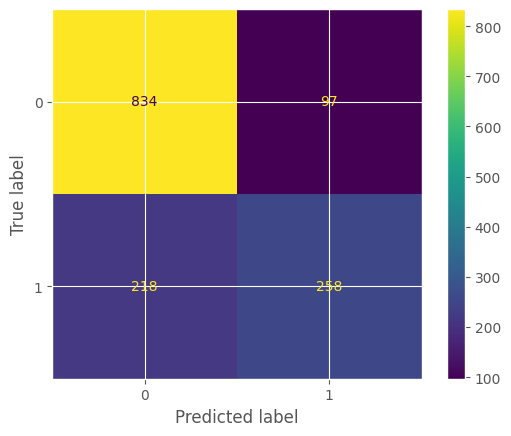

In [202]:
#get the performance of the model using by plotting the confusion metrix
ConfusionMatrixDisplay.from_predictions(preds, y_test);

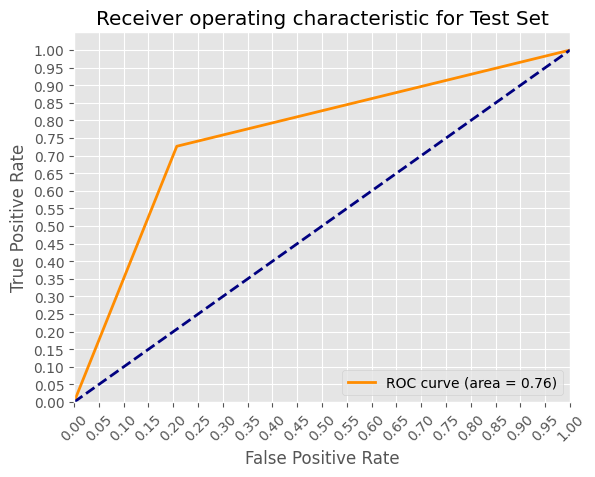

In [203]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks(rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

In [204]:
#our model is performing poorly on the F1 score,but better than the the knn. We have low precison on the 1 class but high recall leading to
#an F1 score of 62%. We will try a different model and see the resulsts. The ROC is 75%

In [205]:
#check important features
imp_feats = pd.DataFrame(data=rf.feature_importances_,
                        index=X.columns,
                        columns=['Feat Imp'])

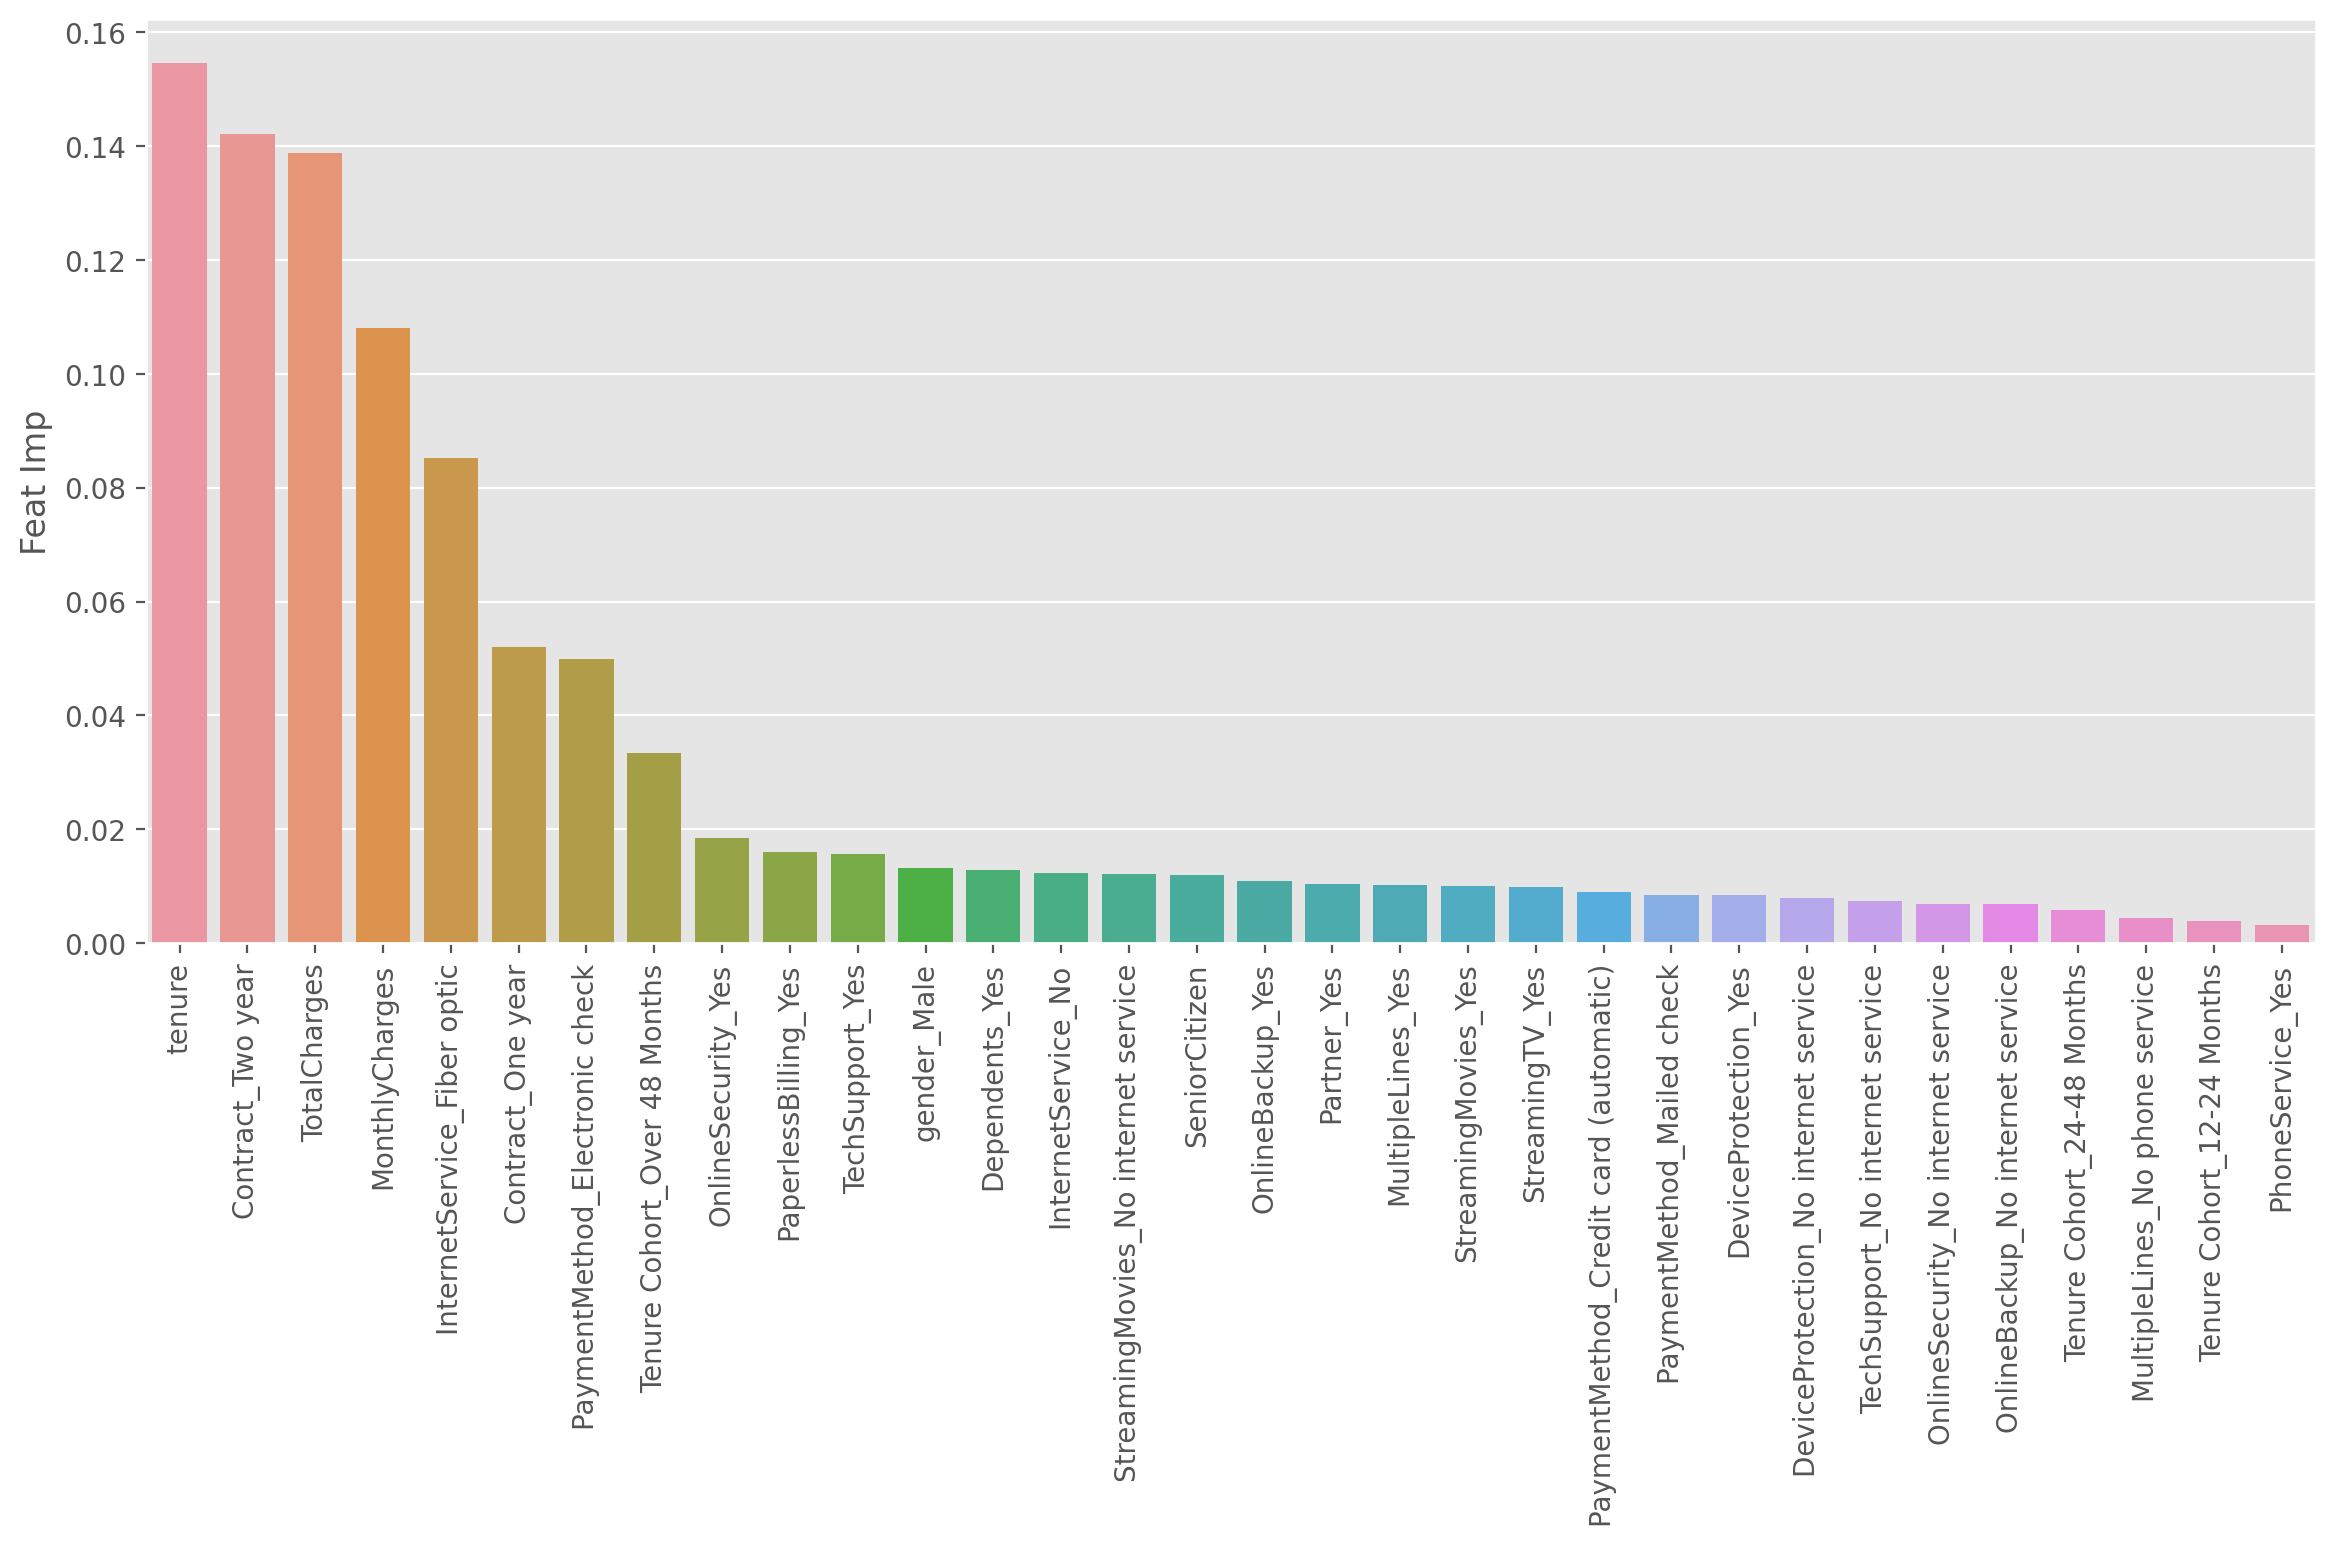

In [206]:

#plot features that have a weight greater than 0
imp_feats = imp_feats[imp_feats['Feat Imp']>0]
#sort_values in the data frame
imp_feats = imp_feats.sort_values('Feat Imp', ascending=False)
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats, x=imp_feats.index, y ='Feat Imp');
plt.xticks(rotation=90);

In [207]:
#the most important features in the dataframe according random forest classifier are :
#tenure,monthly charges, total charges, internetservice_fibre optic, tech_support, online_security, contract_type, payment method, cohort Tenure

### AdaBoost
**Random forest didnt do quite well as it has a lot of misclassification. We venture to train and predict our data on Adaboost Model**
AdaBoost is short for Adaptive Boosting and is a very popular boosting technique that combines multiple “weak classifiers” into a single “strong classifier”. 

In [208]:
# import the Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [209]:
#instantiate the model

ada = AdaBoostClassifier(n_estimators=100)

#fit the model on the training data
ada.fit(X_train, y_train)

#make predictions
preds = ada.predict(X_test)

In [210]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.64      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



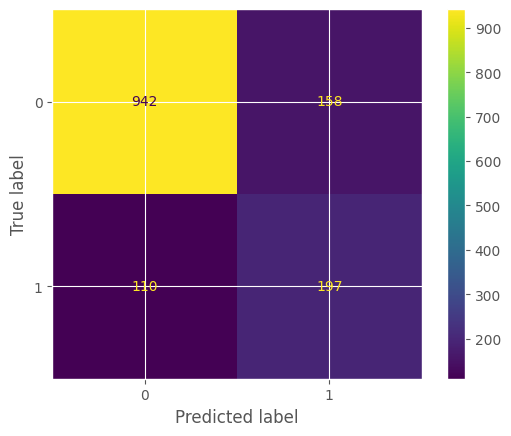

In [211]:
#get the performance of the model using by plotting the confusion metrix
ConfusionMatrixDisplay.from_predictions(preds, y_test);

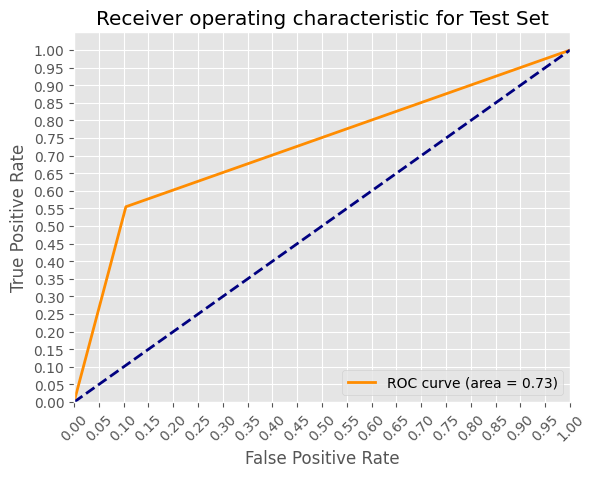

In [212]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks(rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

In [213]:
#Adaboost has the best performance so far with an accuracy score of 84% with an F1 score of 60%. Our recall is generally still low we 
#will try out xGBoost to see if our recall will improve.The ROC_AUC is 73%

### XGBoost (eXtreme Gradient Boosting)
XGBoost was designed basically to improve speed and model performance.

In [214]:
# import the XGBoost classifier
from xgboost import XGBClassifier

In [215]:
# instantiate the classifier
xgb = XGBClassifier()


In [216]:
#fit the traing data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [217]:
#make predictions
preds = xgb.predict(X_test)

In [218]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1052
           1       0.61      0.51      0.56       355

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



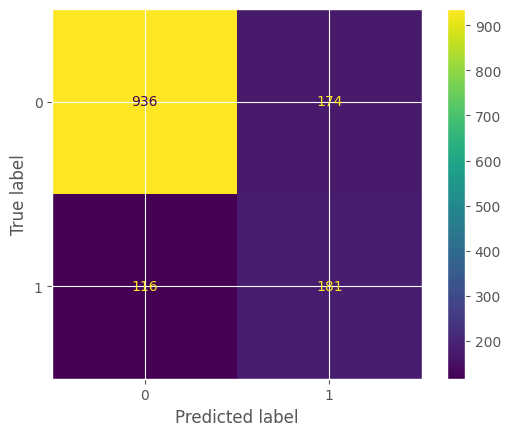

In [219]:
#get the performance of the model using by plotting the confusion metrix
ConfusionMatrixDisplay.from_predictions(preds, y_test);

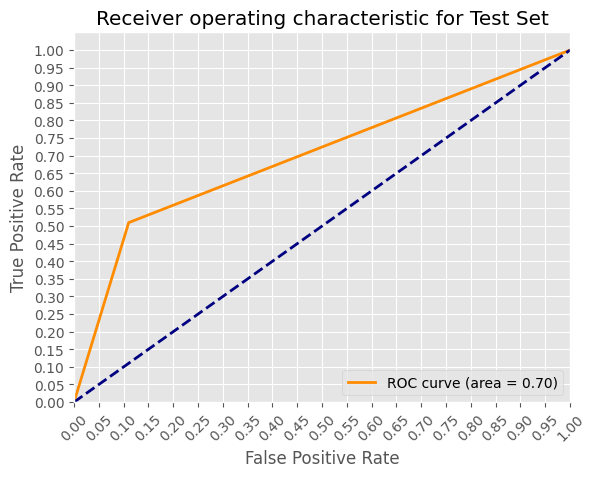

In [220]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks(rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

In [221]:
#XGBoost a slightly lower than Adaboost accuracy- 79%  and an F1 score of 56% on our yes churn(1) class compred to 86 on the no nurn class(0). Our recall is generally still low we 
#the AUC_ROC is 70%
#will try out hyperparameter tuning to see if our recall will improve

### XGBoost with class Balancing using SMOTE
SMOTE creates new synthetic minority samples instead of copy pasting the already available data points.

In [222]:
# Smote oversampling
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
# summarize class distribution
print(Counter(y_train))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 4111, 1: 1514})
Counter({0: 4111, 1: 4111})


In [223]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [50, 100, 200],
}


grid_clf = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_SMOTE, y_train_SMOTE)
best_parameters = grid_clf.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
preds = grid_clf.predict(X_test)


Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 1
n_estimators: 100
subsample: 0.7


In [224]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1052
           1       0.59      0.59      0.59       355

    accuracy                           0.79      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



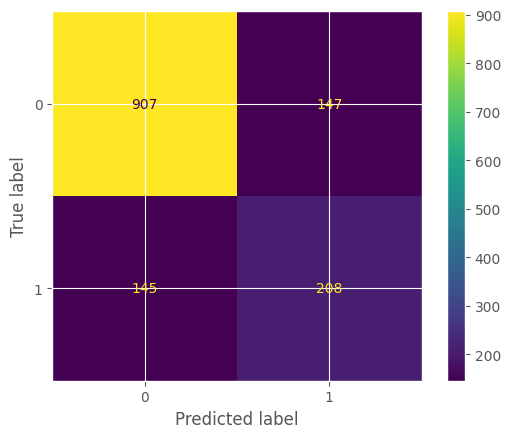

In [225]:
#get the performance of the model using by plotting the confusion metrix
ConfusionMatrixDisplay.from_predictions(preds, y_test)

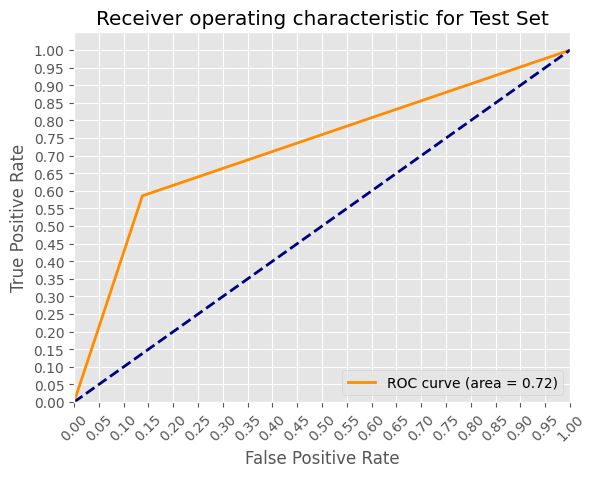

In [226]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks(rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

In [227]:
# The F1 score now increase by 4% to 60%, but the accuracy score goes down by 1% 60 79%

### Random Forest with Resampled data

In [228]:
#instantiate the Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=50, max_features=10, max_depth=10, class_weight="balanced")

#fit the model to the train data
rf1.fit(X_train_SMOTE, y_train_SMOTE)

#make predictions
preds = rf1.predict(X_test)

In [229]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1052
           1       0.54      0.72      0.62       355

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.78      0.78      1407



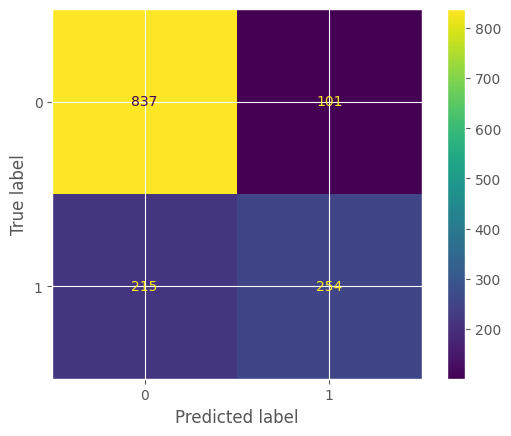

In [230]:
ConfusionMatrixDisplay.from_predictions(preds, y_test);

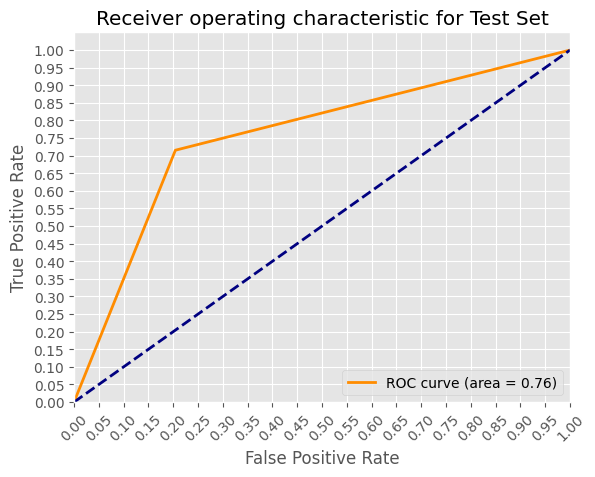

<Figure size 640x480 with 0 Axes>

In [231]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks(rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()
plt.savefig("./images/randomFRE.png")

In [232]:
# We dont notice any much change as we see the the F1 score for class 1 is still at 58%, but there is a decline in the accuracy score to
#72% and the ROC_AUC(76%)

### Adaboost with tuned parameters and resampled data

In [233]:
# defining the classifier
ada2 = AdaBoostClassifier()
# creating a dic for the grid
param_grid={'n_estimators': [10, 50, 100, 200, 500],
           'learning_rate':[0.0001, 0.01, 0.1, 1.0, 1.1, 1.2]}

# initializing the grid search
grid_search = GridSearchCV(estimator=ada2, param_grid=param_grid, n_jobs=1, cv=None, scoring='accuracy')
# training the model on grid search for hyperparameter tuning of Adaboost
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

# finding the best results /hyperparameter tuning of Adaboost
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

best_parameters = grid_search.best_params_
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))
#make predictisctions
preds = grid_search.predict(X_test)


Best: 0.837897 using {'learning_rate': 1.0, 'n_estimators': 500}
Grid Search found the following optimal parameters: 
learning_rate: 1.0
n_estimators: 500


In [234]:
#get the performance of the model using the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1052
           1       0.58      0.64      0.61       355

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.80      0.79      0.80      1407



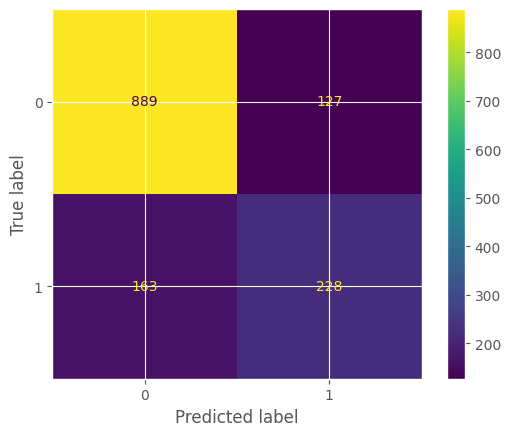

In [235]:
ConfusionMatrixDisplay.from_predictions(preds, y_test);

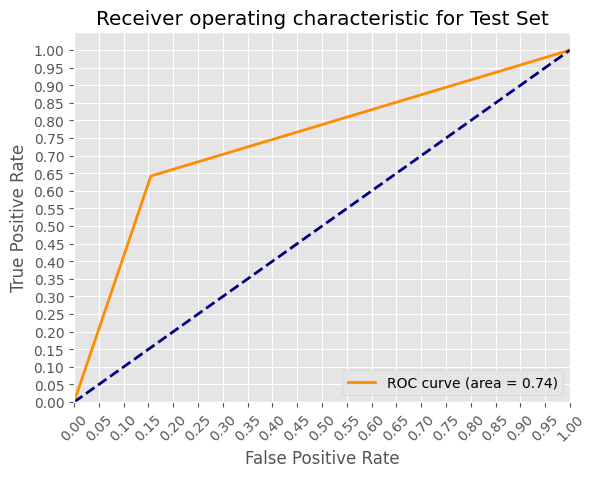

In [236]:
# Compute the false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xticks(rotation=45)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Test Set')
plt.legend(loc="lower right")
plt.show()

In [237]:
# Our F1 score only improves by 2% after resampling and our accuracy score drops to 78% from 81%. Our ROC_AUc is good (75%)

### Conclusion

In conclusion the Random forest and Adaboost tied with compared to the random forest classifier,Xgboost following closely. In terms of precison and recall I will go for random Forest as it has better precision compared to other models. Logistic and Knn also did quite well as  there was only a margin of 5% between the best(F1 score of 61% on the 1 class (churn) and 85% on the 0 class(not churn))  model and the one that did not perform quite well Knn. The best average F1 score was 74%. The score didnt change much even after over sampling and using parameter tuning techniques for each model using gridSearch.

The Model's bests feaures are tenure,total charges, Monthly charges,contract type,internet service especially fibre optic, Tenure cohort and online security


To challenge the solution, As we saw earlier, our target class data was very imbalance. We  can say that the data collection on the 'not churn' class was much higher compared to the 'churn yes'. 
I will also need to do more search on best models that can handle imbalanced data well, or train a single class to see how to learns and predict the unseen data

### Recommendations

From the Analysis, More attention should be given to customers who are on month-to-Month contract and have stayed with the company for long. This can help reduce the churn rate realized in this class of contract. customers on Month-to-Month contract dont bring more income to the company as evidenced in the in the plot above if encouraged to join the contracts more than a year. The companys would gain more money.A high churn rate is also seen for customers who are subscribed to the Fibre optic internet service. Better services such as online security and Tech support to could help retain customer base in this sector.
